In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import time

file_path = 'World Skills.xlsx'

#data = pd.read_excel(file_path, nrows=5000)
data = pd.read_excel(file_path)

data.shape

(18517, 23)

In [146]:
pd.set_option('display.max_columns', 111)
data.describe()

,total_amount,salvo_per_unit_of_everything,total,salvo_per_unit_of_everything_,_justification_,total_,k_t,unit_kilogram,general_,titul_number
count,1.783400e+04,0.0,1.772800e+04,1.851700e+04,0.0,0.0,265.000000,0.0,0.0,0.0
mean,7.400080e+02,NaN,3.163205e+04,2.271317e+06,NaN,NaN,2242.960679,NaN,NaN,NaN
std,4.245975e+04,NaN,3.323359e+05,2.439306e+07,NaN,NaN,11037.080203,NaN,NaN,NaN
min,-6.744000e+03,NaN,-2.024268e+06,-1.518201e+08,NaN,NaN,0.130000,NaN,NaN,NaN
25%,1.194250e-01,NaN,3.598000e+01,1.694250e+03,NaN,NaN,30.600000,NaN,NaN,NaN
50%,2.118600e+00,NaN,4.713550e+02,2.898000e+04,NaN,NaN,208.530000,NaN,NaN,NaN
75%,2.087185e+01,NaN,3.902082e+03,2.645490e+05,NaN,NaN,985.650000,NaN,NaN,NaN
max,4.573726e+06,NaN,2.940155e+07,2.205117e+09,NaN,NaN,162294.580000,NaN,NaN,NaN


In [147]:
#Распределение пропущенных значений в столбцах
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

number_PP - 0.0%
justification - 2.0%
name - 0.0%
unit - 0.0%
total_amount - 4.0%
price - 1.0%
salvo_per_unit_of_everything - 100.0%
justification_ - 70.0%
total - 4.0%
salvo_per_unit_of_everything_ - 0.0%
_justification_ - 100.0%
total_ - 100.0%
k_t - 99.0%
class - 99.0%
unit_kilogram - 100.0%
general_ - 100.0%
titul_number - 100.0%
number_rsl - 0.0%
number_slot - 0.0%
enub_cd_number - 0.0%
Unnamed: 20 - 100.0%
Unnamed: 21 - 51.0%
Unnamed: 22 - 14.0%


In [148]:
#Разделяем признаки на категориальные и количественные
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
data[categorical_columns].describe()

,number_PP,justification,name,unit,price,justification_,class,number_rsl,number_slot,enub_cd_number,Unnamed: 20,Unnamed: 21,Unnamed: 22
count,18507,18198,18511,18499,18385,5639,249.00000,18517,18517,18515,67,9096,15973
unique,828,2333,6423,40,4802,15,157.00000,41,2,212,1,842,1
top,43,-,Болты с гайками и шайбами строительные,т,1,полн,0.88495,200,п,0226.2016-02-200-СМ-5981-0 общестроительные ра...,лот 1,0067.2017-03-403-АС.СО-0001,Руб
freq,151,891,138,4484,229,3990,12.00000,2154,14744,691,67,1213,15973


In [149]:
#Преобразовываем столбец 'price' к числовому значению. Меняем , на . и удаляем лишние символы из строки
data['price'].replace(',', '.', regex=True, inplace=True)
data['price'].replace('[^,.0-9]', '', regex=True, inplace=True)
data['price'].replace('[,./d+]', '', regex=True, inplace=True)

sum = 0
for index, row in data.iterrows():
    #print(len(re.findall(substring_re,row['number_PP'])))
    #if len(re.findall(substring_re,row['number_PP'])) != 21:
    #if not row['total_amount'].isdigit():
    if not str(row['price']).isdigit():
        #print(row['total_amount'])
    #if re.findall(row['number_PP'], ', ') == '':
        #data.drop(index)
        sum = sum + 1
        #new_data.drop(index, inplace=True)
#data = data.loc[len(re.findall(data['number_PP'],', ')) == 20]
print(sum)

data['price']

11994


0               6.41
1             3500.7
2               4.83
3            10297.3
4            9078.49
            ...     
18512         181.07
18513         375.37
18514          65.16
18515         139.16
18516    25282219035
Name: price, Length: 18517, dtype: object

In [150]:
data = data[:-1]
data['price']

0           6.41
1         3500.7
2           4.83
3        10297.3
4        9078.49
          ...   
18511     141.94
18512     181.07
18513     375.37
18514      65.16
18515     139.16
Name: price, Length: 18516, dtype: object

In [151]:
#Преобразовываем столбец 'price' к числовому значению. Меняем , на . и удаляем лишние значения, которые попали с других столбцов
#data['price'] = pd.to_numeric(data['price'])
data['price'] = data['price'].astype(float)
data['price'].describe()


count    1.838400e+04
mean     3.211921e+33
std      4.095672e+35
min      5.000000e-02
25%      6.824000e+01
50%      5.818480e+03
75%      1.502388e+08
max      5.541337e+37
Name: price, dtype: float64

In [152]:
data[['k_t', 'class', 'justification_', 'Unnamed: 21']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18516 entries, 0 to 18515
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   k_t             265 non-null    float64
 1   class           249 non-null    object 
 2   justification_  5638 non-null   object 
 3   Unnamed: 21     9095 non-null   object 
dtypes: float64(1), object(3)
memory usage: 578.8+ KB


In [153]:
data['class'].unique()

array(['Нет', nan, 5.1555, 2.912, 0.46944, 0.46924, 0.4483, 0.4521,
       0.4572, 0.45514, 0.4755, 0.4753, 0.38666, 0.47922, 0.34985,
       0.49094, 0.885, 0.884, 0.6, 0.46, 0.065, 0.621, 0.03, 1.104, 2.047,
       0.556, 0.6316, 1.888, 1.561, 1.4115, 1.033, 0.692, 0.88495,
       0.91332, 1.15608, 2.8319, 2.90501, 3.16219, 1.188, 3.6462, 1.60805,
       0.8827, 1.2053, 3.546, 5.90745, 3.09697, 0.48996, 0.32781, 0.21377,
       1.044, 0.9686, 1.0956, 0.88496, 5.45824, 1.63771, 1.51437, 3.35862,
       5.594, 3.746, 2.59847, 1.45523, 1.42683, 2.69059, 2.9611, 1.2774,
       1.25795, 2.03334, 4.17614, 1.6751, 1.464, 1.139, 1.61564, 3.2827,
       0.802, 3.48877, 8.463, 1.78, 1.24963, 1.5615, 1.562, 3.391, 0.9427,
       1.40376, 1.514, 12.255, 6.926, 6.874, 21.287, 3.036, 1.67653,
       2.1523, 2.9523, 0.0701, 3.193, 1.394, 1.715, 1.54764, 1.5901,
       1.15122, 1.13069, 4.77783, 1.4038, 1.05061, 5.6675, 2.69, 1.401,
       3.161, 2.903, 1.0248, 1.2379, 1.1621, 1.3789, 0.452, 0.2661,

In [154]:
data['justification_'].unique()

array([nan, 0.017, 0.515, 0.159, 0.213, 0.096, 'пол', 'ср', 'чт', 'пт',
       'сб', 'вс', 'пн', 'вт', 'полн', 'об'], dtype=object)

In [155]:
data['class'] = data['class'].replace('Нет', np.nan, regex=True)
data['class'] = data['class'].astype(float)

In [156]:
data['class']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
18511   NaN
18512   NaN
18513   NaN
18514   NaN
18515   NaN
Name: class, Length: 18516, dtype: float64

In [157]:
data[['class']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18516 entries, 0 to 18515
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   248 non-null    float64
dtypes: float64(1)
memory usage: 144.8 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10ba348df0>]],
      dtype=object)

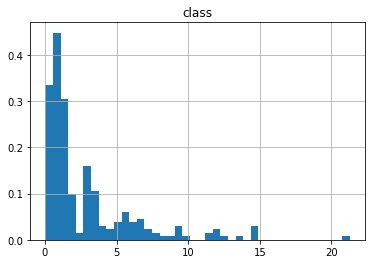

In [170]:
data.hist(column='class', bins=40, density=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10bc23a100>]],
      dtype=object)

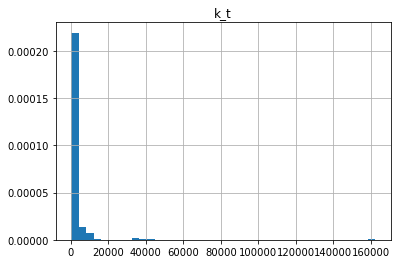

In [171]:
data.hist(column='k_t', bins=40, density=True)

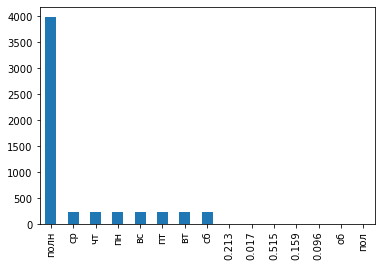

In [168]:
data['justification_'].value_counts().plot(kind='bar')

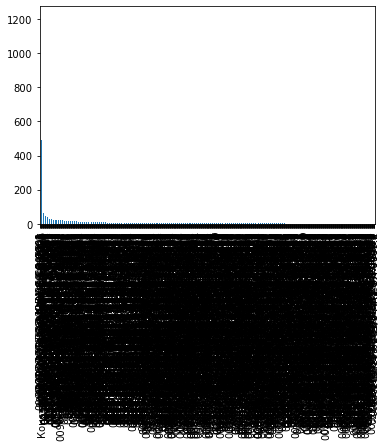

In [169]:
data['Unnamed: 21'].value_counts().plot(kind='bar')

In [173]:
label_encoder = preprocessing.LabelEncoder() 
for x in ['justification_', 'Unnamed: 21']:
    label_encoder.fit(data[x].astype('str')) 
    data[x] = label_encoder.transform(data[x].astype('str'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18516 entries, 0 to 18515
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   number_PP                      18506 non-null  object 
 1   justification                  18197 non-null  object 
 2   name                           18510 non-null  object 
 3   unit                           18498 non-null  object 
 4   total_amount                   17833 non-null  float64
 5   price                          18384 non-null  float64
 6   salvo_per_unit_of_everything   0 non-null      float64
 7   justification_                 18516 non-null  int64  
 8   total                          17727 non-null  float64
 9   salvo_per_unit_of_everything_  18516 non-null  float64
 10  _justification_                0 non-null      float64
 11  total_                         0 non-null      float64
 12  k_t                            265 non-null   

In [174]:
data.corr()

,total_amount,price,salvo_per_unit_of_everything,justification_,total,salvo_per_unit_of_everything_,_justification_,total_,k_t,class,unit_kilogram,general_,titul_number,Unnamed: 21
total_amount,1.000000,-0.000129,NaN,-0.008581,0.055338,0.054993,NaN,NaN,0.750205,-0.044847,NaN,NaN,NaN,-0.000116
price,-0.000129,1.000000,NaN,-0.004890,0.000550,0.000577,NaN,NaN,0.280078,-0.067169,NaN,NaN,NaN,-0.011496
salvo_per_unit_of_everything,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
justification_,-0.008581,-0.004890,NaN,1.000000,-0.026114,-0.024993,NaN,NaN,-0.025367,0.254908,NaN,NaN,NaN,-0.018220
total,0.055338,0.000550,NaN,-0.026114,1.000000,1.000000,NaN,NaN,0.597982,-0.124754,NaN,NaN,NaN,0.012653
salvo_per_unit_of_everything_,0.054993,0.000577,NaN,-0.024993,1.000000,1.000000,NaN,NaN,0.599742,-0.127915,NaN,NaN,NaN,0.012281
_justification_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k_t,0.750205,0.280078,NaN,-0.025367,0.597982,0.599742,NaN,NaN,1.000000,0.000952,NaN,NaN,NaN,-0.209556
class,-0.044847,-0.067169,NaN,0.254908,-0.124754,-0.127915,NaN,NaN,0.000952,1.000000,NaN,NaN,NaN,0.221353


In [126]:
#Преобразовываем столбец 'number_pp' к численному типу
group = 0
prev = -999999
for index, row in data.iterrows():
    #print(data['number_PP'][index])
    if str(row['number_PP']).isdigit():
        #print(prev, int(row['number_PP']) + 1)
        if  int(row['number_PP']) == prev + 1:
            data.loc[index, 'number_PP'] = group
        else:
            group = group + 1
            data.loc[index, 'number_PP'] = group
        prev = int(row['number_PP'])
       #print(prev, int(row['number_PP'])
    else:
        data.loc[index, 'number_PP'] = group
data['number_PP'] = data['number_PP'].astype(int)

In [127]:
#Выкидываем столбцы, в которых больше 10% пропущенных значений
data.drop([#Все значения пустые
                'salvo_per_unit_of_everything', '_justification_',
                'total_', 'unit_kilogram', 'general_', 'titul_number',
                'Unnamed: 20'
                #'Unnamed: 22',
               #Столбцы, которые несут мало информации, но их тяжело обробатывать
              #  'name', 'justification', 'number_PP',
               #Столбцы, которые плохо коррелируют с price
             #убираем всё
            #'total', 'number_rsl', 'enub_cd_number', 'salvo_per_unit_of_everything_', 'price'
              # 'total_amount','total', 'salvo_per_unit_of_everything_'
               ], inplace=True, axis=1)

In [128]:
#Распределение пропущенных значений в столбцах
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

number_PP - 0.0%
justification - 2.0%
name - 0.0%
unit - 0.0%
total_amount - 4.0%
price - 1.0%
total - 4.0%
salvo_per_unit_of_everything_ - 0.0%
number_rsl - 0.0%
number_slot - 0.0%
enub_cd_number - 0.0%
Unnamed: 22 - 14.0%


In [129]:
#y = data['number_slot']
#data.drop('number_slot', inplace=True, axis=1)
#Разделяем признаки на категориальные и количественные
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
data[categorical_columns].describe()

,justification,name,unit,number_rsl,number_slot,enub_cd_number,Unnamed: 22
count,18197,18510,18498,18516,18516,18514,15972
unique,2332,6422,40,41,2,212,1
top,-,Болты с гайками и шайбами строительные,т,200,п,0226.2016-02-200-СМ-5981-0 общестроительные ра...,Руб
freq,891,138,4484,2154,14744,691,15972


In [130]:
#Заменяем пустые значения на самые часто встречаемые в своём атрибуте
data_describe = data[categorical_columns].describe(include=[object])
for c in data[categorical_columns]:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [131]:
#Заменяем пустые значения числовых признаков на медиану
data = data.fillna(data.median(axis=0), axis=0)

In [132]:
#Распределение пропущенных значений в столбцах
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

number_PP - 0.0%
justification - 0.0%
name - 0.0%
unit - 0.0%
total_amount - 0.0%
price - 0.0%
total - 0.0%
salvo_per_unit_of_everything_ - 0.0%
number_rsl - 0.0%
number_slot - 0.0%
enub_cd_number - 0.0%
Unnamed: 22 - 0.0%


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18516 entries, 0 to 18515
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   number_PP                      18516 non-null  int64  
 1   justification                  18516 non-null  object 
 2   name                           18516 non-null  object 
 3   unit                           18516 non-null  object 
 4   total_amount                   18516 non-null  float64
 5   price                          18516 non-null  float64
 6   total                          18516 non-null  float64
 7   salvo_per_unit_of_everything_  18516 non-null  float64
 8   number_rsl                     18516 non-null  object 
 9   number_slot                    18516 non-null  object 
 10  enub_cd_number                 18516 non-null  object 
 11  Unnamed: 22                    18516 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usag

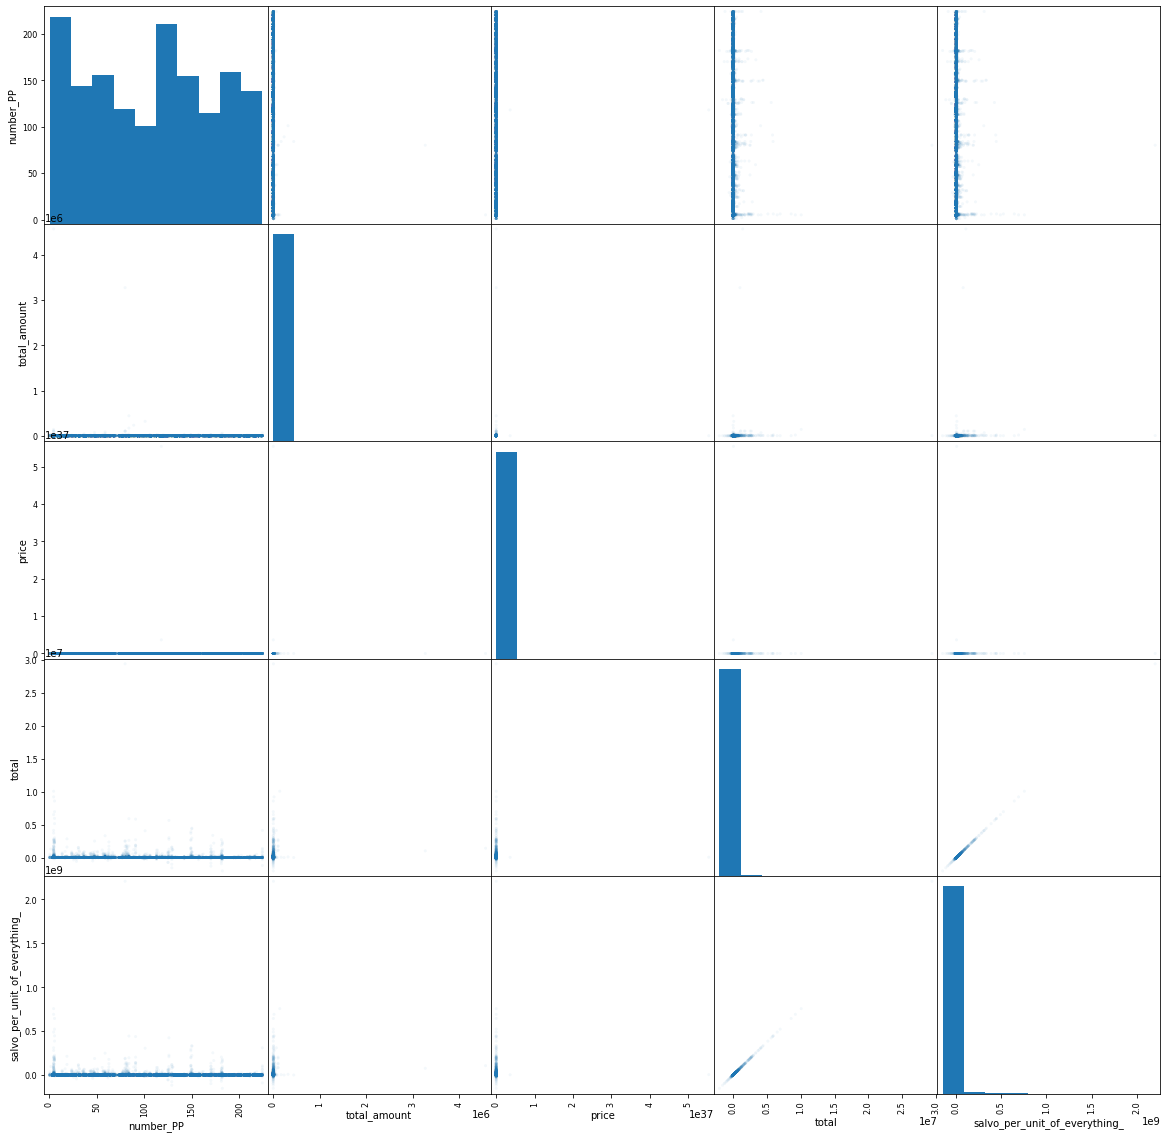

In [134]:
scatter_matrix(data, alpha=0.05, figsize=(20, 20));

In [135]:
data.corr()

,number_PP,total_amount,price,total,salvo_per_unit_of_everything_
number_PP,1.000000,-0.013761,0.001239,-0.045308,-0.045300
total_amount,-0.013761,1.000000,-0.000133,0.054904,0.054903
price,0.001239,-0.000133,1.000000,0.000575,0.000576
total,-0.045308,0.054904,0.000575,1.000000,1.000000
salvo_per_unit_of_everything_,-0.045300,0.054903,0.000576,1.000000,1.000000


In [136]:
#Нормализуем количественные признаки
data_numerical = data[numerical_columns]
scale_features_std = StandardScaler() 
data_numerical = scale_features_std.fit_transform(data_numerical) 

scale_features_mm = MinMaxScaler() 
data_numerical = scale_features_mm.fit_transform(data_numerical)
data_numerical = pd.DataFrame(data_numerical)

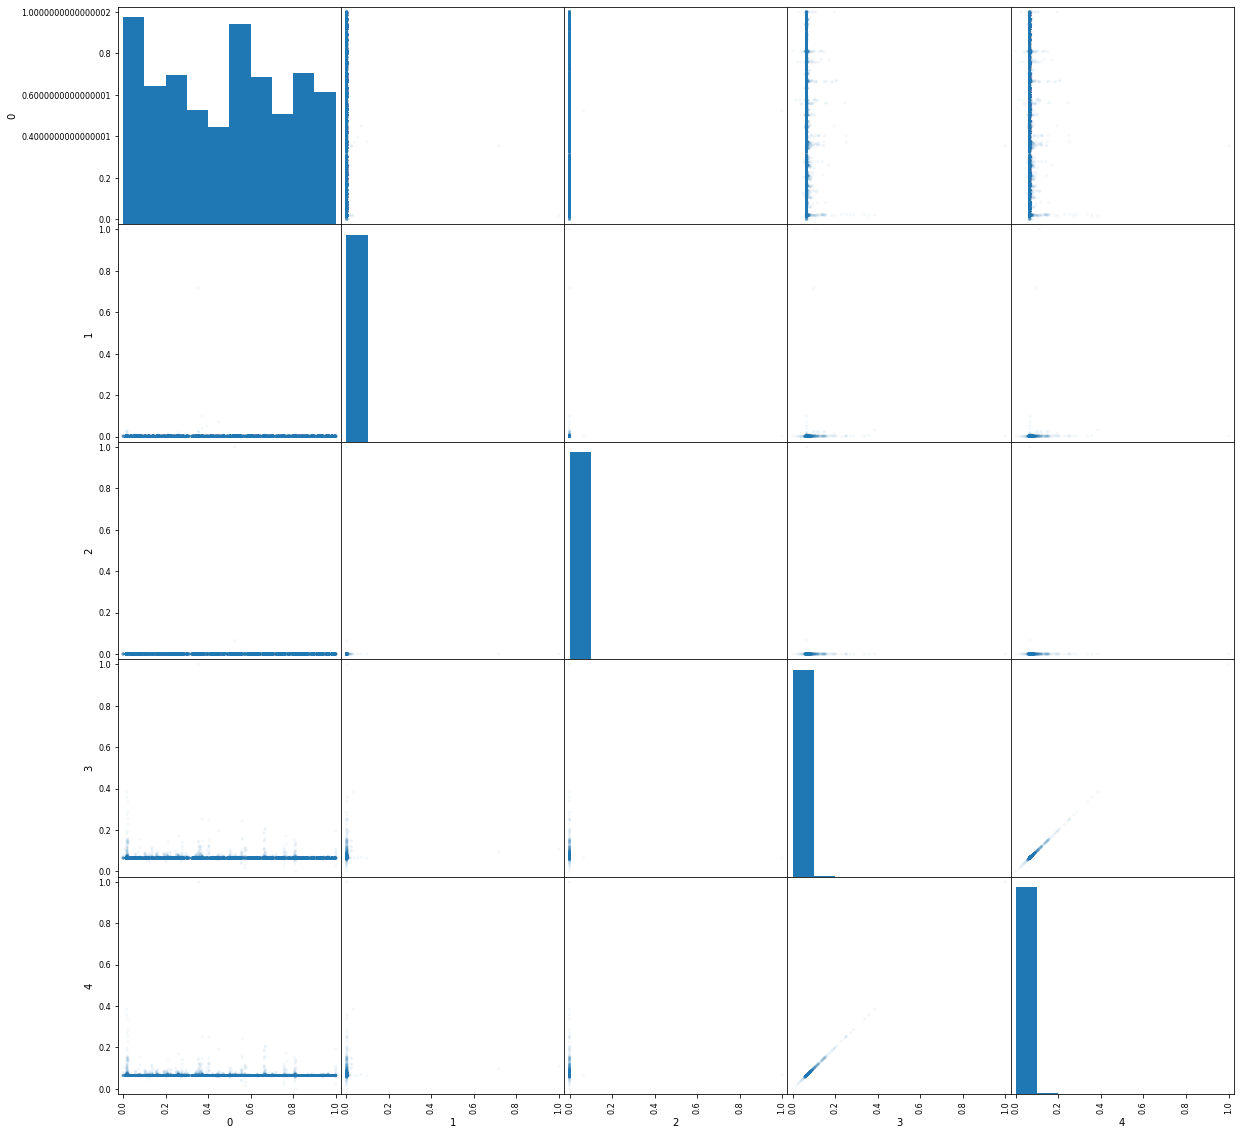

In [137]:
scatter_matrix(data_numerical, alpha=0.05, figsize=(20, 20));

In [138]:
data_numerical.corr()

,0,1,2,3,4
0,1.000000,-0.013761,0.001239,-0.045308,-0.045300
1,-0.013761,1.000000,-0.000133,0.054904,0.054903
2,0.001239,-0.000133,1.000000,0.000575,0.000576
3,-0.045308,0.054904,0.000575,1.000000,1.000000
4,-0.045300,0.054903,0.000576,1.000000,1.000000


In [139]:
data_numerical

,0,1,2,3,4
0,0.0,0.006574,0.0,0.069180,0.069180
1,0.0,0.001473,0.0,0.064429,0.064414
2,0.0,0.001473,0.0,0.064429,0.064414
3,0.0,0.001473,0.0,0.064429,0.064414
4,0.0,0.001473,0.0,0.064429,0.064414
...,...,...,...,...,...
18511,1.0,0.001845,0.0,0.072115,0.072115
18512,1.0,0.001083,0.0,0.054138,0.054138
18513,1.0,0.001454,0.0,0.063396,0.063396
18514,1.0,0.001462,0.0,0.064319,0.064319


In [140]:
categorical_columns

['justification',
 'name',
 'unit',
 'number_rsl',
 'number_slot',
 'enub_cd_number',
 'Unnamed: 22']

In [141]:
label_encoder = preprocessing.LabelEncoder() 
for x in categorical_columns:
    print(1)
    label_encoder.fit(data[x].astype('str')) 
    data[x] = label_encoder.transform(data[x].astype('str'))
data.info()

1
1
1
1
1
1
1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18516 entries, 0 to 18515
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   number_PP                      18516 non-null  int64  
 1   justification                  18516 non-null  int64  
 2   name                           18516 non-null  int64  
 3   unit                           18516 non-null  int64  
 4   total_amount                   18516 non-null  float64
 5   price                          18516 non-null  float64
 6   total                          18516 non-null  float64
 7   salvo_per_unit_of_everything_  18516 non-null  float64
 8   number_rsl                     18516 non-null  int64  
 9   number_slot                    18516 non-null  int64  
 10  enub_cd_number                 18516 non-null  int64  
 11  Unnamed: 22                    18516 non-null  int64  
dtypes: float64(4), int64(8)
memory u

In [142]:
data

,number_PP,justification,name,unit,total_amount,price,total,salvo_per_unit_of_everything_,number_rsl,number_slot,enub_cd_number,Unnamed: 22
0,1,98,1703,27,23366.963,6.41,149782.24,11233668.00,0,1,35,0
1,1,132,4265,34,2.116,3500.70,471.21,0.00,0,1,35,0
2,1,148,4623,26,2.116,4.83,471.21,0.00,0,1,35,0
3,1,151,4863,34,2.116,10297.27,471.21,0.00,0,1,35,0
4,1,174,6365,34,2.116,9078.49,471.21,0.00,0,1,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18511,224,2064,4014,26,1705.000,141.94,242007.70,18150577.50,39,1,63,0
18512,224,2072,1289,27,-1783.500,181.07,-322938.35,-24220376.25,39,1,63,0
18513,224,2073,4871,27,-85.250,375.37,-32000.29,-2400021.75,39,1,63,0
18514,224,2084,3983,27,-45.710,65.16,-2978.46,-223384.50,39,1,63,0


/home/pc-08/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/pc-08/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/pc-08/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


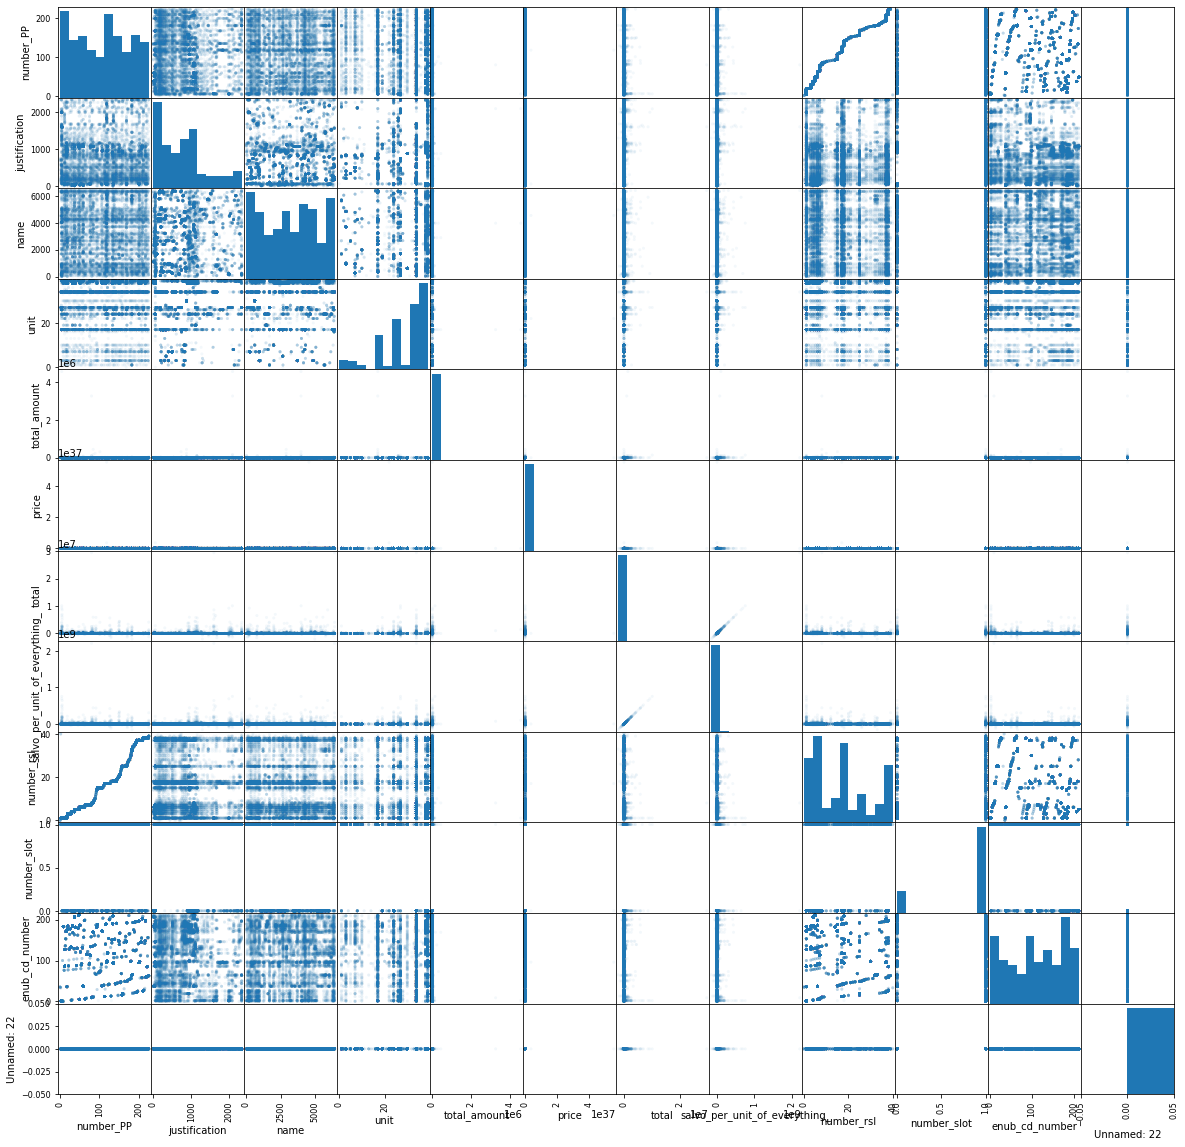

In [143]:
scatter_matrix(data, alpha=0.05, figsize=(20, 20));

In [144]:
data.corr()

,number_PP,justification,name,unit,total_amount,price,total,salvo_per_unit_of_everything_,number_rsl,number_slot,enub_cd_number,Unnamed: 22
number_PP,1.000000,0.012120,-0.005700,-0.068690,-0.013761,0.001239,-0.045308,-0.045300,0.977696,0.092137,-0.045754,NaN
justification,0.012120,1.000000,-0.003050,0.044430,0.024489,-0.009142,0.079259,0.079287,0.021072,-0.111920,-0.121618,NaN
name,-0.005700,-0.003050,1.000000,0.092986,0.003460,0.005459,0.008134,0.008126,-0.009082,-0.036877,0.049297,NaN
unit,-0.068690,0.044430,0.092986,1.000000,-0.016021,-0.005488,0.009696,0.009695,-0.070958,-0.301320,-0.023051,NaN
total_amount,-0.013761,0.024489,0.003460,-0.016021,1.000000,-0.000133,0.054904,0.054903,-0.012967,0.006942,-0.019023,NaN
price,0.001239,-0.009142,0.005459,-0.005488,-0.000133,1.000000,0.000575,0.000576,0.000432,-0.015450,-0.001625,NaN
total,-0.045308,0.079259,0.008134,0.009696,0.054904,0.000575,1.000000,1.000000,-0.043731,-0.081171,-0.048284,NaN
salvo_per_unit_of_everything_,-0.045300,0.079287,0.008126,0.009695,0.054903,0.000576,1.000000,1.000000,-0.043722,-0.081198,-0.048295,NaN
number_rsl,0.977696,0.021072,-0.009082,-0.070958,-0.012967,0.000432,-0.043731,-0.043722,1.000000,0.101689,-0.062038,NaN
number_slot,0.092137,-0.111920,-0.036877,-0.301320,0.006942,-0.015450,-0.081171,-0.081198,0.101689,1.000000,-0.155033,NaN
